<center>
<img src='./img/nsidc_logo.png'/>

# **3.0 SMAP Quality Flags**

</center>
---

## 1. **Overview**

This provides an overview of the retrieval quality flags and surface quality flags that are used with SMAP data. 

* Retrieval Quality Flag (combines all surface flags)
* Surface Quality Flag (provides information on why certain areas might be flagged) 

### **Credits**
This tutorial is based on the notebooks originally provided to NSIDC by Adam Purdy. Jennifer Roebuck of NSIDC updated the tutorials to include the latest version of SMAP data and use earthaccess for authentication, seatching for and downloading the data in order to incorporate it into the NSIDC-Data-Tutorials repo. 

For questions regarding the notebook, or to report problems, please create a new issue in the [NSIDC-Data-Tutorials repo](https://github.com/nsidc/NSIDC-Data-Tutorials/issues).


### **Learning Goals**

1. Understand the retrieval and surface quality flags and how to use them

### **Prerequisites**

1. The nsidc-tutorials environment is set up and activated. This [README](https://github.com/nsidc/NSIDC-Data-Tutorials/blob/main/README.md) has setup instructions.
2. SMAP data that were downloaded in the first notebook tutorial - 1.0 Download SMAP data. 

### **Time Requirement**

Allow approximtely 5 to 10 minutes to complete this tutorial. 

## **2. Tutorial Steps**

### Import libraries


In [1]:
import datetime as dt
import glob
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

Read in the SMAP data that we downloaded in the previous notebook.

In [2]:
this_dir = os.getcwd()
L3_SM_P_dir = os.path.join(this_dir, 'data/L3_SM_P/')

flist = glob.glob(os.path.join(L3_SM_P_dir, '*.h5'))
filename = flist[0]; 


Read in the soil moisture and surface_flag variables from the Soil_Moisture_Retrieval_Data_AM group in each of the files. 

In [4]:
f = h5py.File(filename, 'r')
group_id = 'Soil_Moisture_Retrieval_Data_AM'
var_id = list(f[group_id].keys())[25] # soil_moisture
sm_data = f[group_id][var_id][:,:]
surf_flag_L3_P = f[group_id]['surface_flag'][:,:]

Now lets look at the two types of flags

### Retrieval Flags 

Four different values are possible, as outlined in the cell below. We will plot the retrieval quality flag and in the resulting plot areas that have a value of 0 (black regions) include data of recommended quality. 

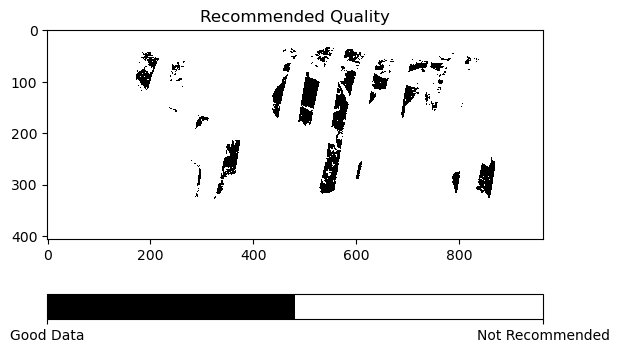

In [5]:
# Grab the Retrieval Quality Variable
ret_flag_L3_P = f[group_id]['retrieval_qual_flag'][:,:]
# Create a definition for the retrieval flags
ret_flags = {
    0:'Recommended Quality',
    1:'Retrieval Attempted',
    2:'Retrieval Successful',
    3:'Undefined'
}
# SMAP RECOMMENDED QUALITY BIT IS 0
fig, ax = plt.subplots()

cax = ax.imshow((ret_flag_L3_P>>0)&1, cmap=plt.cm.get_cmap('bone', 2))
ax.set_title(ret_flags[0])

cbar = fig.colorbar(cax, ticks=[0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Good Data', 'Not Recommended'])  # horizontal colorbar

plt.show()


### Surface Flags 

The different values that the flag can have are listed in the cell below 

In [6]:
surf_flags = {
    0:'Static water body',
    1:'Radar water body detection',
    2:'Coastal Proximity',
    3:'Urban Area',
    4:'Precipitation',
    5:'Snow or Ice',
    6:'Permanent Snow or Ice',
    7:'Frozen Ground (radiometer)',
    8:'Frozen Ground (model)',
    9:'Mountainous Terrain',
    10:'Dense Vegetation',
    11:'Nadir Region',
    12:'Undefined'
}

Now we will plot the surface flags, where black areas indicate no flag and white areas indicate flagged data.

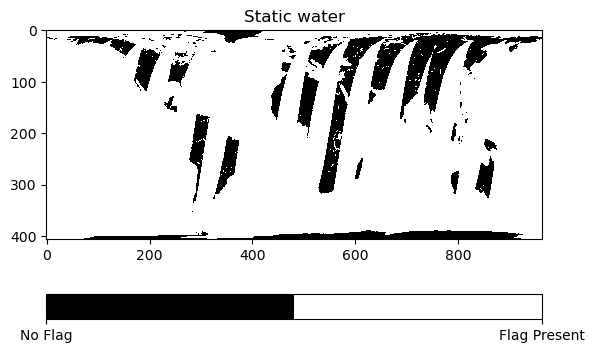

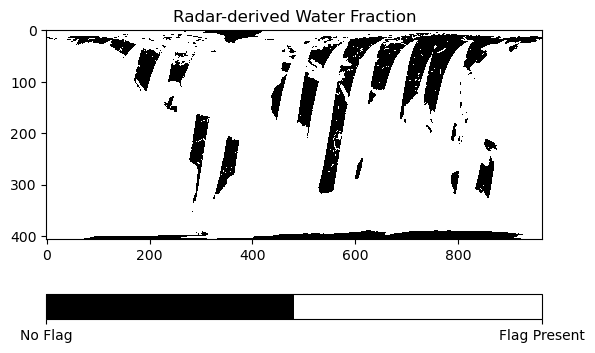

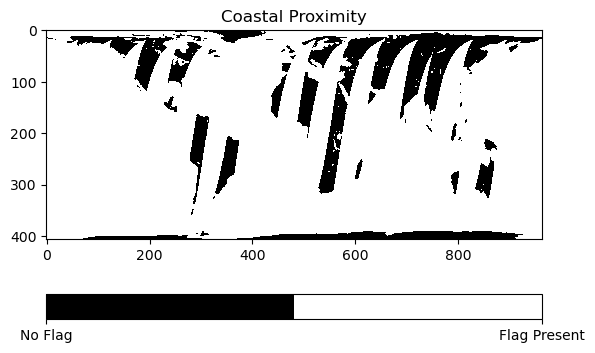

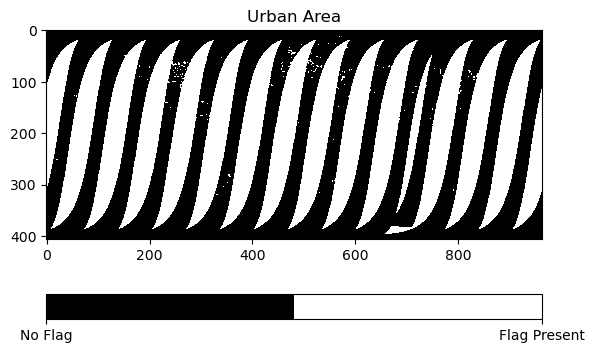

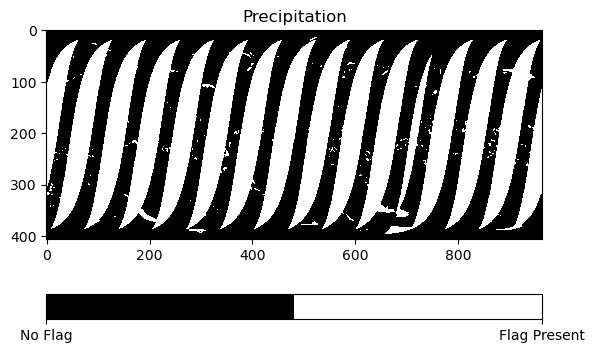

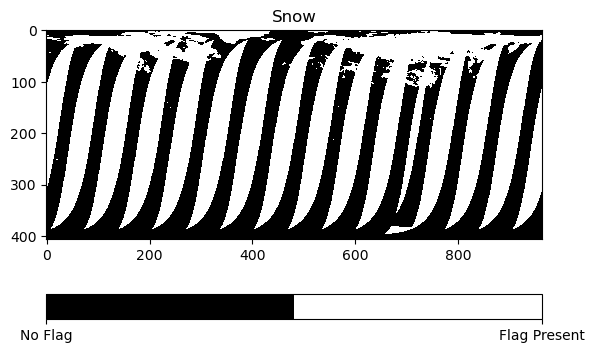

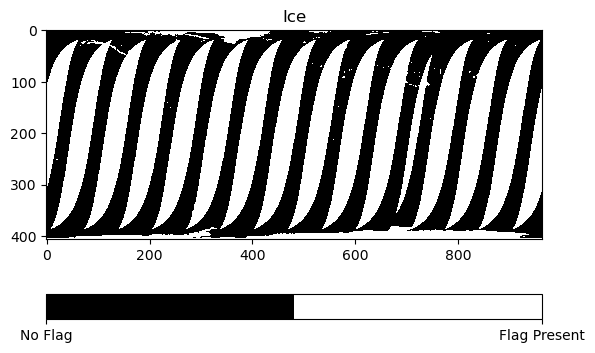

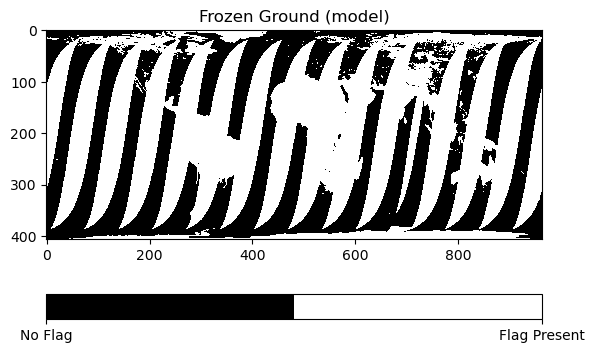

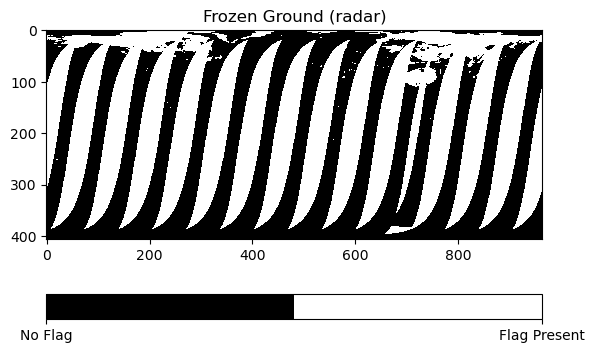

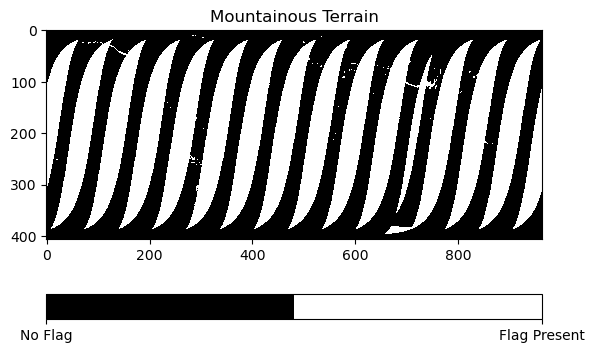

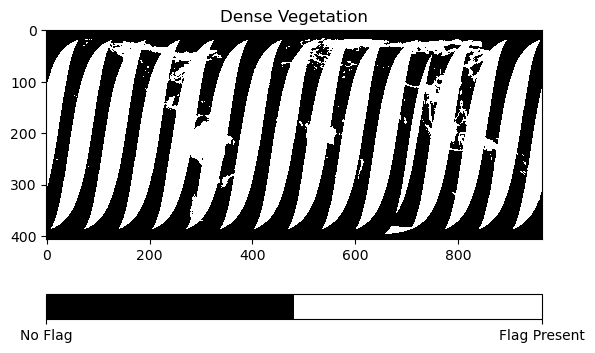

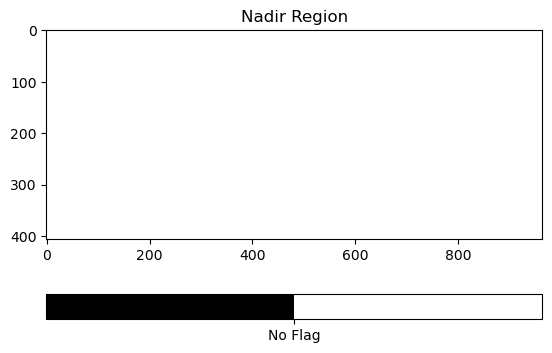

In [7]:
for i in np.arange(0,12):
    fig, ax = plt.subplots()
    cax = ax.imshow((surf_flag_L3_P>>i)&1, cmap=plt.cm.get_cmap('bone', 2))
    ax.set_title(surf_flags[i])
    cbar = fig.colorbar(cax, ticks=[0, 1], orientation='horizontal')
    cbar.ax.set_xticklabels(['No Flag', 'Flag Present'])  # horizontal colorbar
    plt.show()